# LetsGrowMore Data Science Internship January 2022

# Intermediate Level Task 2-Prediction using Decision Tree Algorithm

# Submitted by - Prajakta Thorat

# Importing the Libraries

In [1]:
# Load Libraries

import numpy as np               #numpy lib used doing various operations on arrays
import pandas as pd              #pandas lib used for doing statstical calculations
import seaborn as sns            #seaborn lib is also used to interpreting the data in various graphs
import matplotlib.pyplot as plt  #Matplotlib lib is used for interpreting data in various graphs

# Load Dataset

In [2]:
iris = pd.read_csv('IRIS.csv')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Read Dataset

First 10 records

In [4]:
First_10_records = iris.head(10)

In [20]:
First_10_records

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [7]:
iris['species_class']=np.where(iris.species=='Iris-virginica',1,np.where(iris.species=='Iris-versicolor',2,3))

In [8]:
iris.species_class.value_counts()

3    50
2    50
1    50
Name: species_class, dtype: int64

In [9]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_class'],
      dtype='object')

In [10]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [11]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(iris[cols],iris['species_class'],test_size = 0.2,random_state = 123)

In [12]:
#Model Building


param_grid = {'max_depth': np.arange(2, 8),'max_features': np.arange(2,5)}

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [14]:
tree.best_score_

0.95

In [15]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=3)

In [16]:
tree.best_params_

{'max_depth': 5, 'max_features': 3}

In [17]:
train_pred = tree.predict(train_X)

In [18]:
test_pred = tree.predict(test_X)

In [19]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.75      1.00      0.86         6
           3       1.00      1.00      1.00        13

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [20]:
#Building Final Decision Tree

clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=2)

In [21]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,'predicted': clf_tree.predict( test_X ) } )

In [22]:
tree_test_pred.sample( n = 10 )

,actual,predicted
31,3,3
45,3,3
63,2,2
4,3,3
133,1,2
127,1,1
36,3,3
46,3,3
138,1,1
132,1,1


In [23]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9666666666666667

C:\Users\Praju\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 15.0, 'Predicted label')

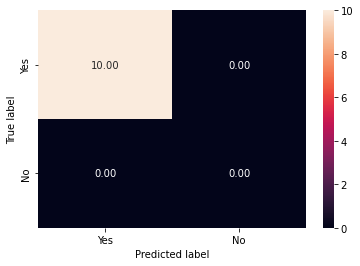

In [24]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,tree_test_pred.actual,[1,0] )
sns.heatmap(tree_cm, annot=True,fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

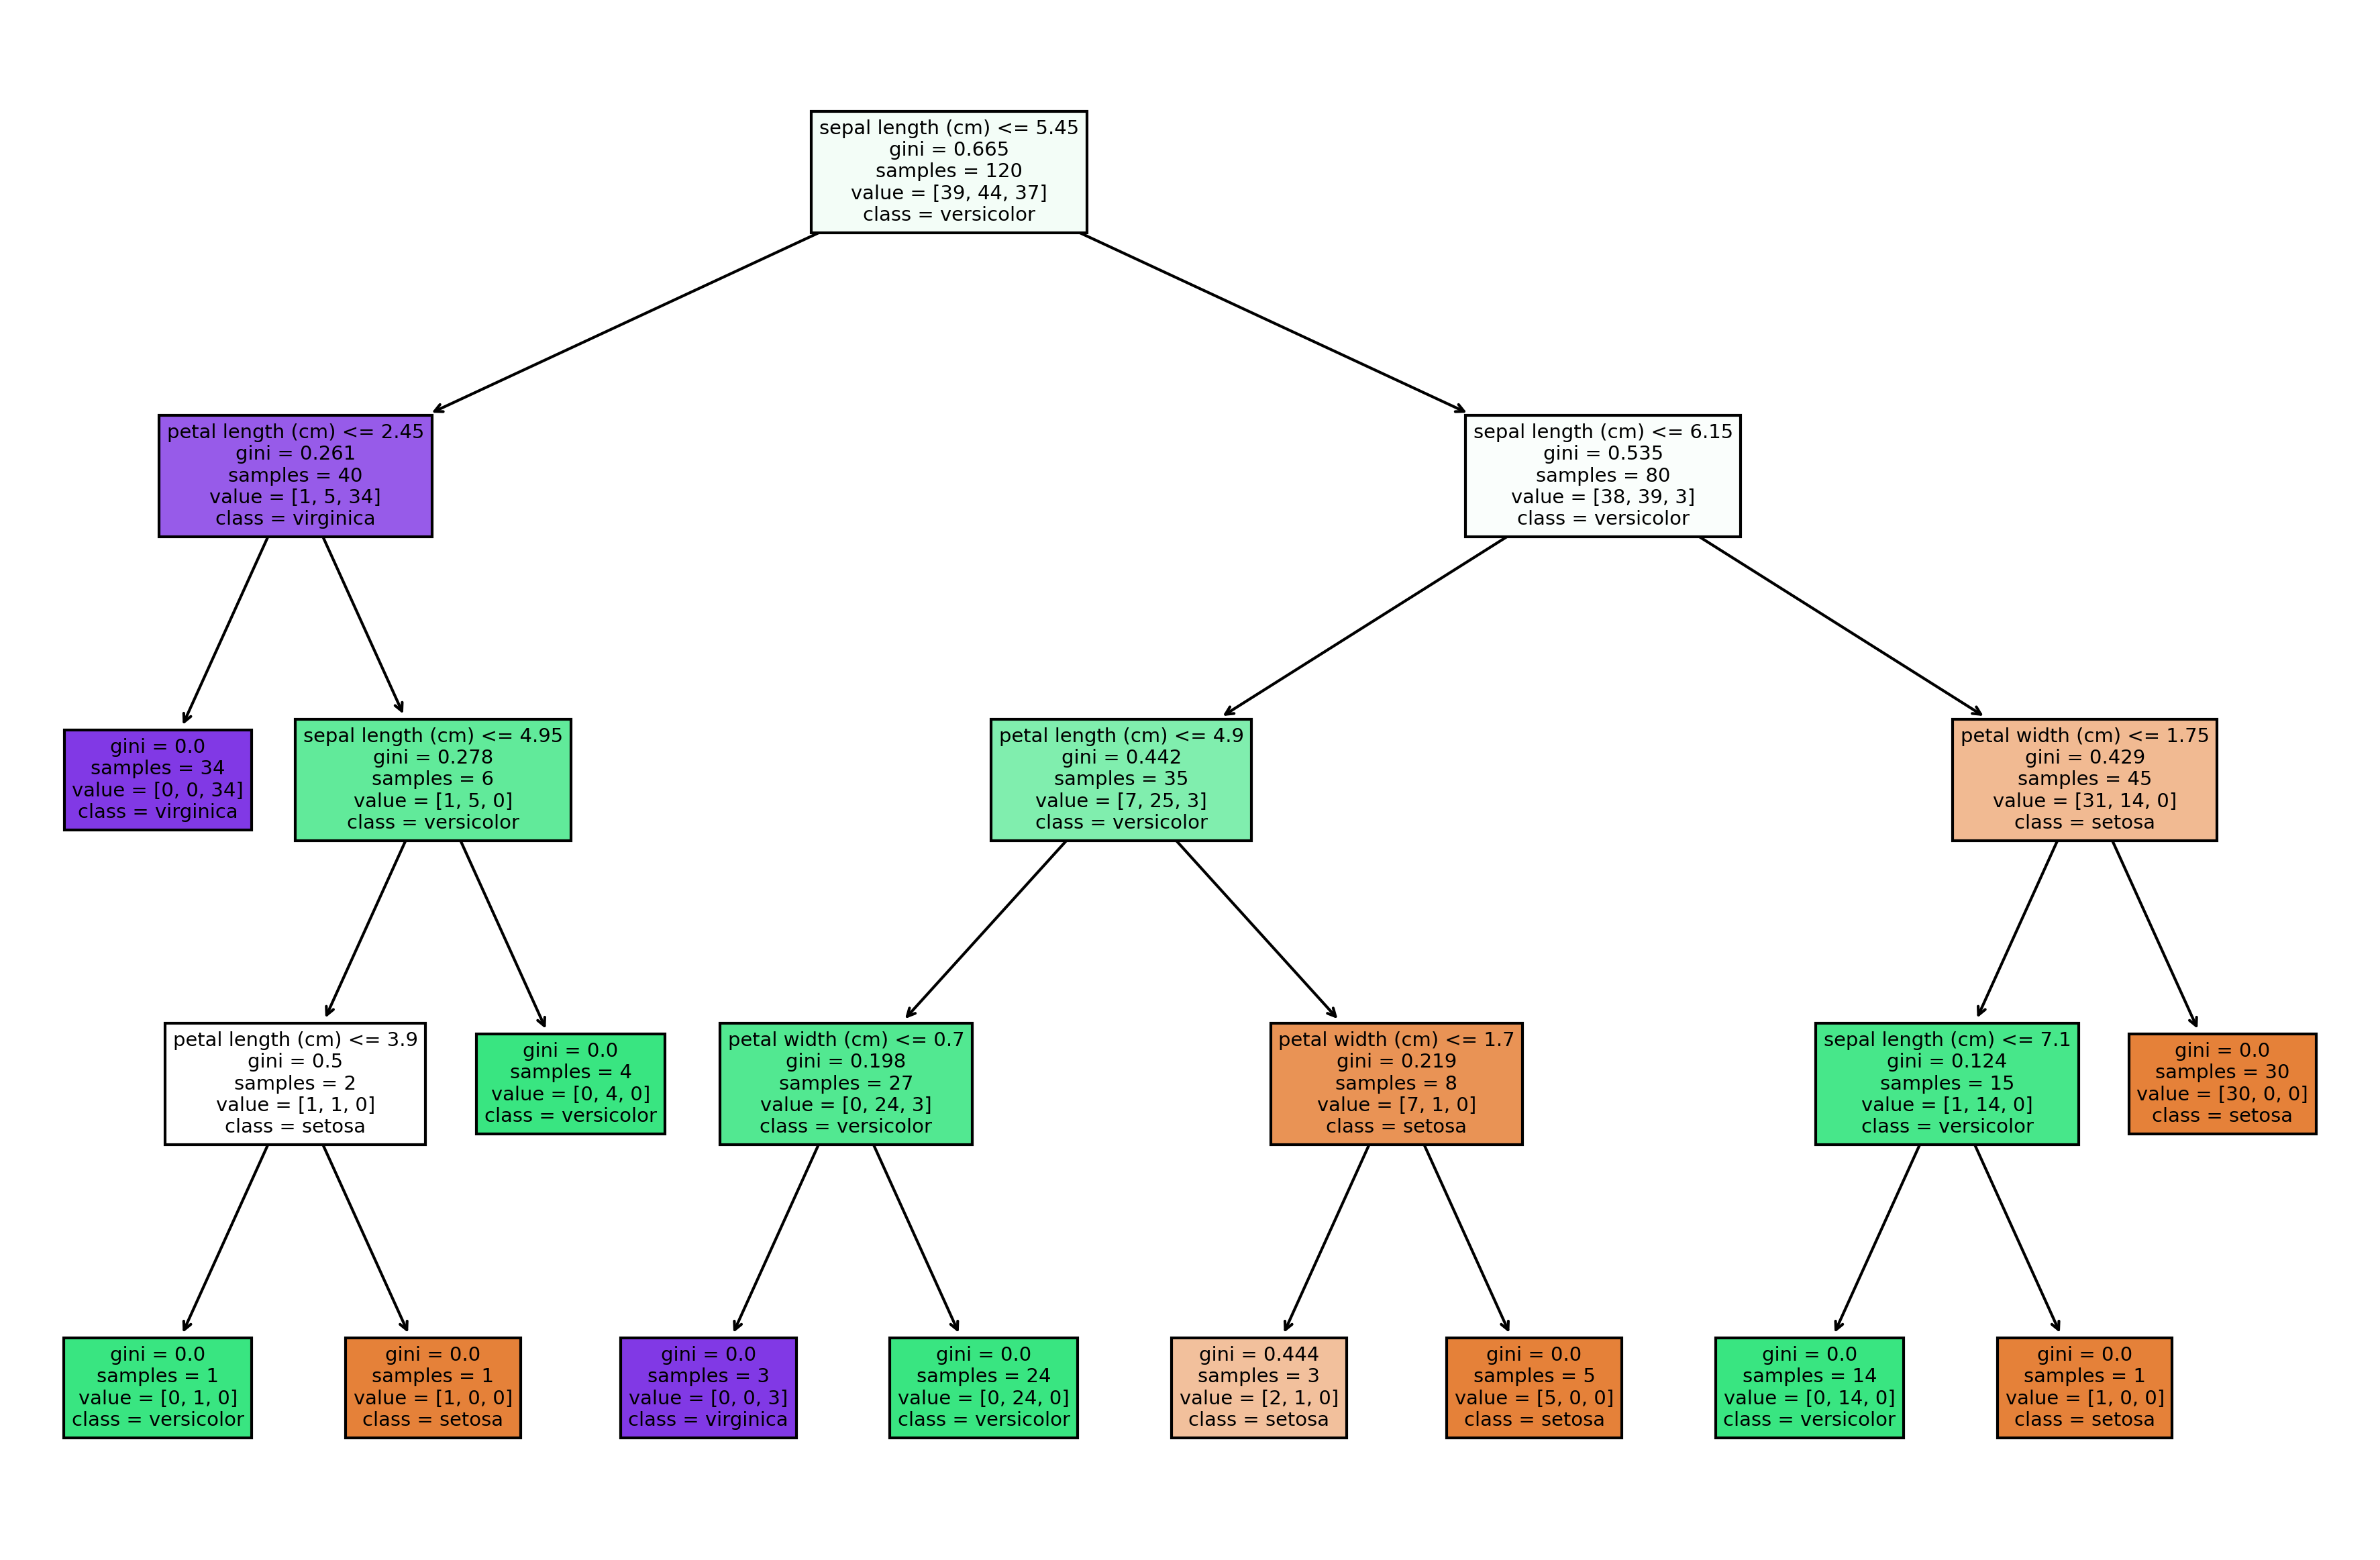

In [43]:
#Graphical Representation of Decision Tree

from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,feature_names = fn, class_names=cn,filled = True);
fig.savefig('imagename.png')